In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.special import gamma

In [3]:
#PROBLEM 1
#PART A

In [4]:
#empty lists for data points
z = []
mExp = []
mErr = []

#opening data file and populating lists 
F = open("supernova_data.txt","r")
f= F.readlines()

for i in range(1,54):
    z.append(float(f[i][:6]))
    mExp.append(float(f[i][7:18]))
    mErr.append(float(f[i][20:]))


/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


M=  -19.100025183969272
OmegaM=  0.2538699681431748
OmegaL=  0.7689003584030284
H0=  71.74566128597235
X2=  120.43539082166618


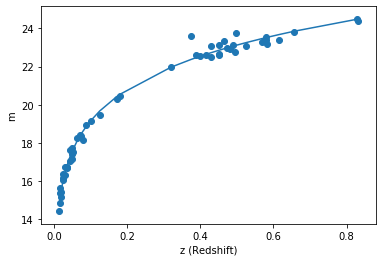

In [5]:
c = 3e5 #km/s

#integrand in dL
def integrand(x,omgM,omgL):
    fun = lambda z0: 1/np.sqrt( omgM*(1+z0)**3 +omgL )
    return quad(fun,0,x)[0]

#given in problem
def dL(x,H0,omgM,omgL):
    return (1e6)*(1+x)*(c/H0)*integrand(x,omgM,omgL)

#given, expected value of m
def m(M,x,H0,omgM,omgL):
    return M+5*( np.log10(dL(x,H0,omgM,omgL))-1 )

#Chi Squared to minimize
def ChiSq(params):
    M,H0,omgM,omgL = params
    X2 =0
    for i in range(len(mExp)-1):
        X2 += ((mExp[i]-m(M,z[i],H0,omgM,omgL))**2)/ (mErr[i]**2) 
    return X2
    

#initial guess and minimization
p0 = [-19, 75, 2, 1] #M,H0 omgM, omgL
res = minimize(ChiSq, p0, method = 'SLSQP', bounds = ((-20,-18),(50,100),(0,3),(-1,4)))

#Getting optimum values
A = [res.x[0],res.x[1],res.x[2],res.x[3]]
M1, H01, omgM1, omgL1 = A
Xa = ChiSq(A)
print('M= ',M1)
print('OmegaM= ',omgM1)
print('OmegaL= ',omgL1)
print('H0= ',H01)
print('X2= ',Xa)

#Plotting
xpts = [i for i in z]
ypts = [m(M1,x,H01,omgM1,omgL1) for x in xpts]
plt.plot(xpts,ypts)
plt.scatter(z,mExp)
plt.xlabel('z (Redshift)')
plt.ylabel('m')
plt.show()

In [6]:
#PART B

M=  -19.104135032199583
OmegaM=  0.2482364725009019
H0=  72.42032140232163
X2=  120.4353907605931


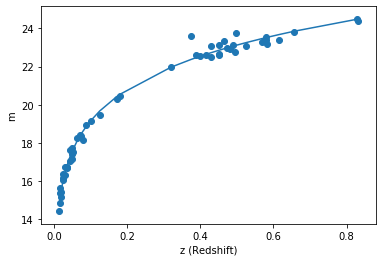

In [7]:
#Same format as part a
def integrandB(x,omgM):
    fun = lambda z0: 1/np.sqrt( omgM*(1+z0)**3 +(1-omgM) )
    return quad(fun,0,x)[0]

def dLB(x,H0,omgM):
    return (1e6)*(1+x)*(c/H0)*integrandB(x,omgM)

def mB(M,x,H0,omgM):
    return M+5*( np.log10(dLB(x,H0,omgM))-1 )



def ChiSq2(params):
    M,H0,omgM = params
    X2 =0
    for i in range(len(mExp)-1):
        X2 += ((mExp[i]-mB(M,z[i],H0,omgM))**2)/ (mErr[i]**2) 
    return X2

p1 = [-19, 78, 2] #M,H0 omgM
res = minimize(ChiSq2, p1, method = 'SLSQP', bounds = ((-20,-18),(50,100),(0,3)))

B = [res.x[0],res.x[1],res.x[2]]
M2, H02, omgM2 = B
Xb = ChiSq2(B)
print('M= ',M2)
print('OmegaM= ',omgM2)
print('H0= ',H02)
print('X2= ',Xb)

xpts = [i for i in z]
ypts = [mB(M2,x,H02,omgM2) for x in xpts]
plt.plot(xpts,ypts)
plt.scatter(z,mExp)
plt.xlabel('z (Redshift)')
plt.ylabel('m')
plt.show()

In [8]:
#There is not a significant difference in the fit, 
#and the difference in X2 between parts a) and b) 
#is roughly 1e-7 and negligible

In [9]:
#PART C

M=  -19.040648580483687
H0=  66.98356070654161
X2=  170.2251735521908


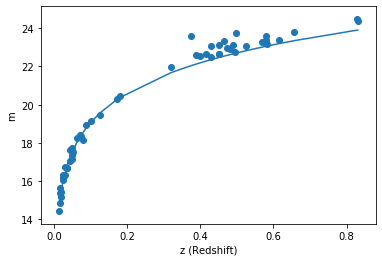

In [10]:
#Same format again
def integrandC(x):
    fun = lambda z0: 1/np.sqrt((1+z0)**3 )
    return quad(fun,0,x)[0]

def dLC(x,H0):
    return (1e6)*(1+x)*(c/H0)*integrandC(x)

def mC(M,x,H0):
    return M+5*( np.log10(dLC(x,H0))-1 )



def ChiSq3(params):
    M,H0 = params
    X2 =0
    for i in range(len(mExp)-1):
        X2 += ((mExp[i]-mC(M,z[i],H0))**2)/ (mErr[i]**2) 
    a = X2
    return X2

p2 = [-19, 78] #M,H0
res = minimize(ChiSq3, p2, method = 'SLSQP', bounds = ((-20,-18),(50,100)))

C = [res.x[0],res.x[1]]
M3, H03 = C
Xc = ChiSq3(C)
print('M= ',M3)
print('H0= ',H03)
print('X2= ',Xc)

xpts = [i for i in z]
ypts = [mC(M1,x,H01) for x in xpts]
plt.plot(xpts,ypts)
plt.scatter(z,mExp)
plt.xlabel('z (Redshift)')
plt.ylabel('m')
plt.show()

In [11]:
#PART D

In [12]:
#Chi-Square distribution function
def fX2(f):
    fun = lambda x: np.exp(-x/2)*(x**((f/2) -1))/ ((2**(f/2))*gamma(f/2))
    return fun

deltaX2 = Xc-Xb

#Finding p-value
ans = quad(fX2(1),deltaX2,np.inf)
print('p-value= ',ans[0])
print('The addition of OmegaL is very much justified considering the minute p-value.')

p-value=  1.7113165741730992e-12
The addition of OmegaL is very much justified considering the minute p-value.


In [13]:
#PROBLEM 2
#PART A

In [14]:
pri_M = 1/2
pri_H0 = 1/50
pri_omgM = 1/3

C0 = pri_omgM*pri_H0*pri_M

#Likelihood in integrand
def LH(M,H0,omgM):
    param = M,H0,omgM
    ans=1
    for i in range(len(mExp)-1):
        ans *= (1/(mErr[i]*np.sqrt(2*np.pi)))
    ans *= np.exp(-ChiSq2(param)/2)
    return ans


def integrand(M,H0,omgM):
    return C0*LH(M,H0,omgM)

#Making/integrating all 3 variable axes to get likelihood
Ms,H0s,omgMs = np.meshgrid(np.linspace(-20,-18,50), np.linspace(50,100,50), np.linspace(0,3,50))

grid= np.zeros_like(Ms)
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        for k in range(grid.shape[2]):
            grid[i][j][k] = integrand(Ms[i][j][k],H0s[i][j][k],omgMs[i][j][k])
                                                                                                    
final = np.trapz(np.trapz(np.trapz(grid,dx=(1/25),axis=0),dx=1,axis=0),dx=3/50,axis=0)
print('Likelihood= ',final)

Likelihood=  2.1765786816562586e-13


In [15]:
#PART B

In [16]:
#Same format as a)
C1 = pri_omgM*pri_H0

def LH2(M,H0):
    param = M,H0
    ans=1
    for i in range(len(mExp)-1):
        ans *= (1/(mErr[i]*np.sqrt(2*np.pi)))
    ans *= np.exp(-ChiSq3(param)/2)
    return ans


def integrand(M,H0):
    return C1*LH2(M,H0)

Ms2,H0s2 = np.meshgrid(np.linspace(-20,-18,50), np.linspace(50,100,50))

grid2= np.zeros_like(Ms2)
for i in range(grid2.shape[0]):
    for j in range(grid2.shape[1]):
        grid2[i][j] = integrand(Ms2[i][j],H0s2[i][j])
                                                                                                    
final2 = np.trapz(np.trapz(grid2,dx=(1/25),axis=0),dx=1,axis=0)
print('Likelihood= ',final2)

Likelihood=  3.6512054781952275e-23


In [17]:
#PART C

In [18]:
B12 = final/final2
print('Bayes factor is ',B12,', strongly favoring model 1 \nfor a universe with dark matter.')

Bayes factor is  5961260451.252748 , strongly favoring model 1 
for a universe with dark matter.
